In [1]:
#importing the libraries

#Data Processing Libraries
import numpy as np
import pandas as pd

#Data Vizualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

# Machine Learning Library
from sklearn.preprocessing import LabelEncoder # Encode Categorical Variable to Numerical Variable
from sklearn.impute import SimpleImputer # Imputer Class to replace missing values
from sklearn.metrics import confusion_matrix # Library for model evaluation
from sklearn.metrics import accuracy_score # Library for model evaluation
from sklearn.model_selection import train_test_split # Library to split datset into test and train

from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble  import RandomForestClassifier # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier # K Nearest neighbors Classifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes Classifier
from sklearn.svm import SVC #Support vector Machine Classifier
from sklearn.ensemble import AdaBoostClassifier # Ada Boost Classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

df = pd.read_csv('telco.csv')
df.describe()
#df[df['TotalCharges'] == ' '].index

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

<Axes: xlabel='Churn', ylabel='count'>

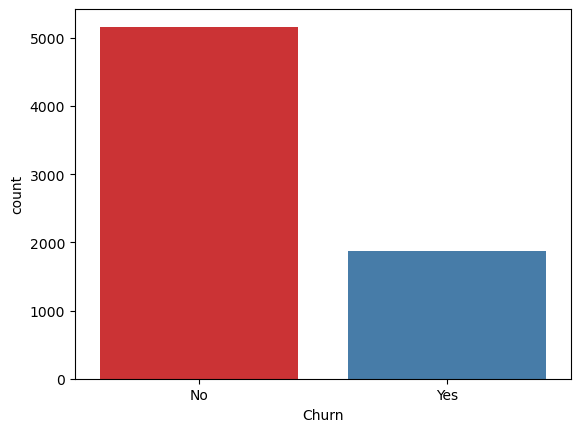

In [2]:
sns.countplot(x=df['Churn'], palette = 'Set1')

<Axes: xlabel='tenure', ylabel='Count'>

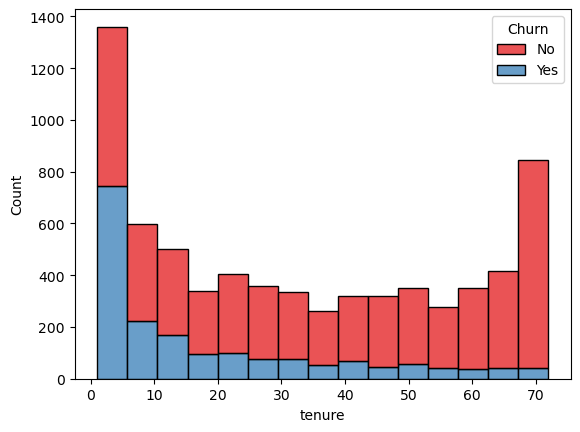

In [3]:
sns.histplot(df, x='tenure', hue='Churn', multiple='stack', palette = 'Set1')

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

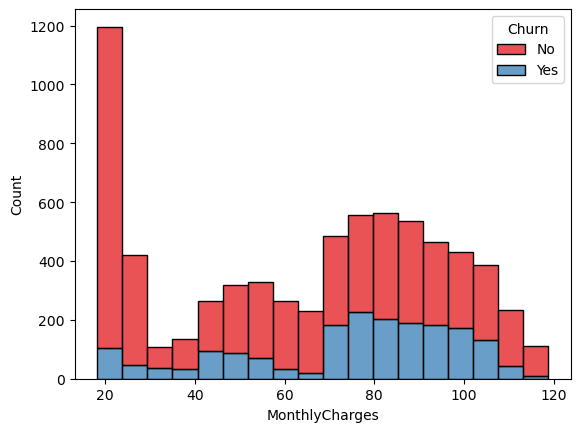

In [4]:
sns.histplot(df, x='MonthlyCharges', hue='Churn', multiple='stack', palette = 'Set1')

<Axes: xlabel='TotalCharges', ylabel='Count'>

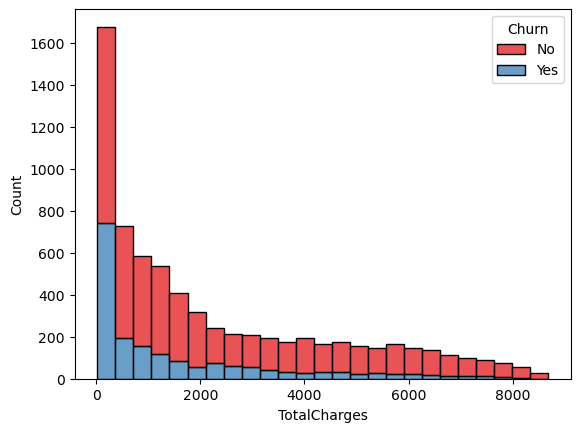

In [5]:
sns.histplot(df, x='TotalCharges', hue='Churn', multiple='stack', palette = 'Set1')

<Axes: xlabel='PaymentMethod', ylabel='Count'>

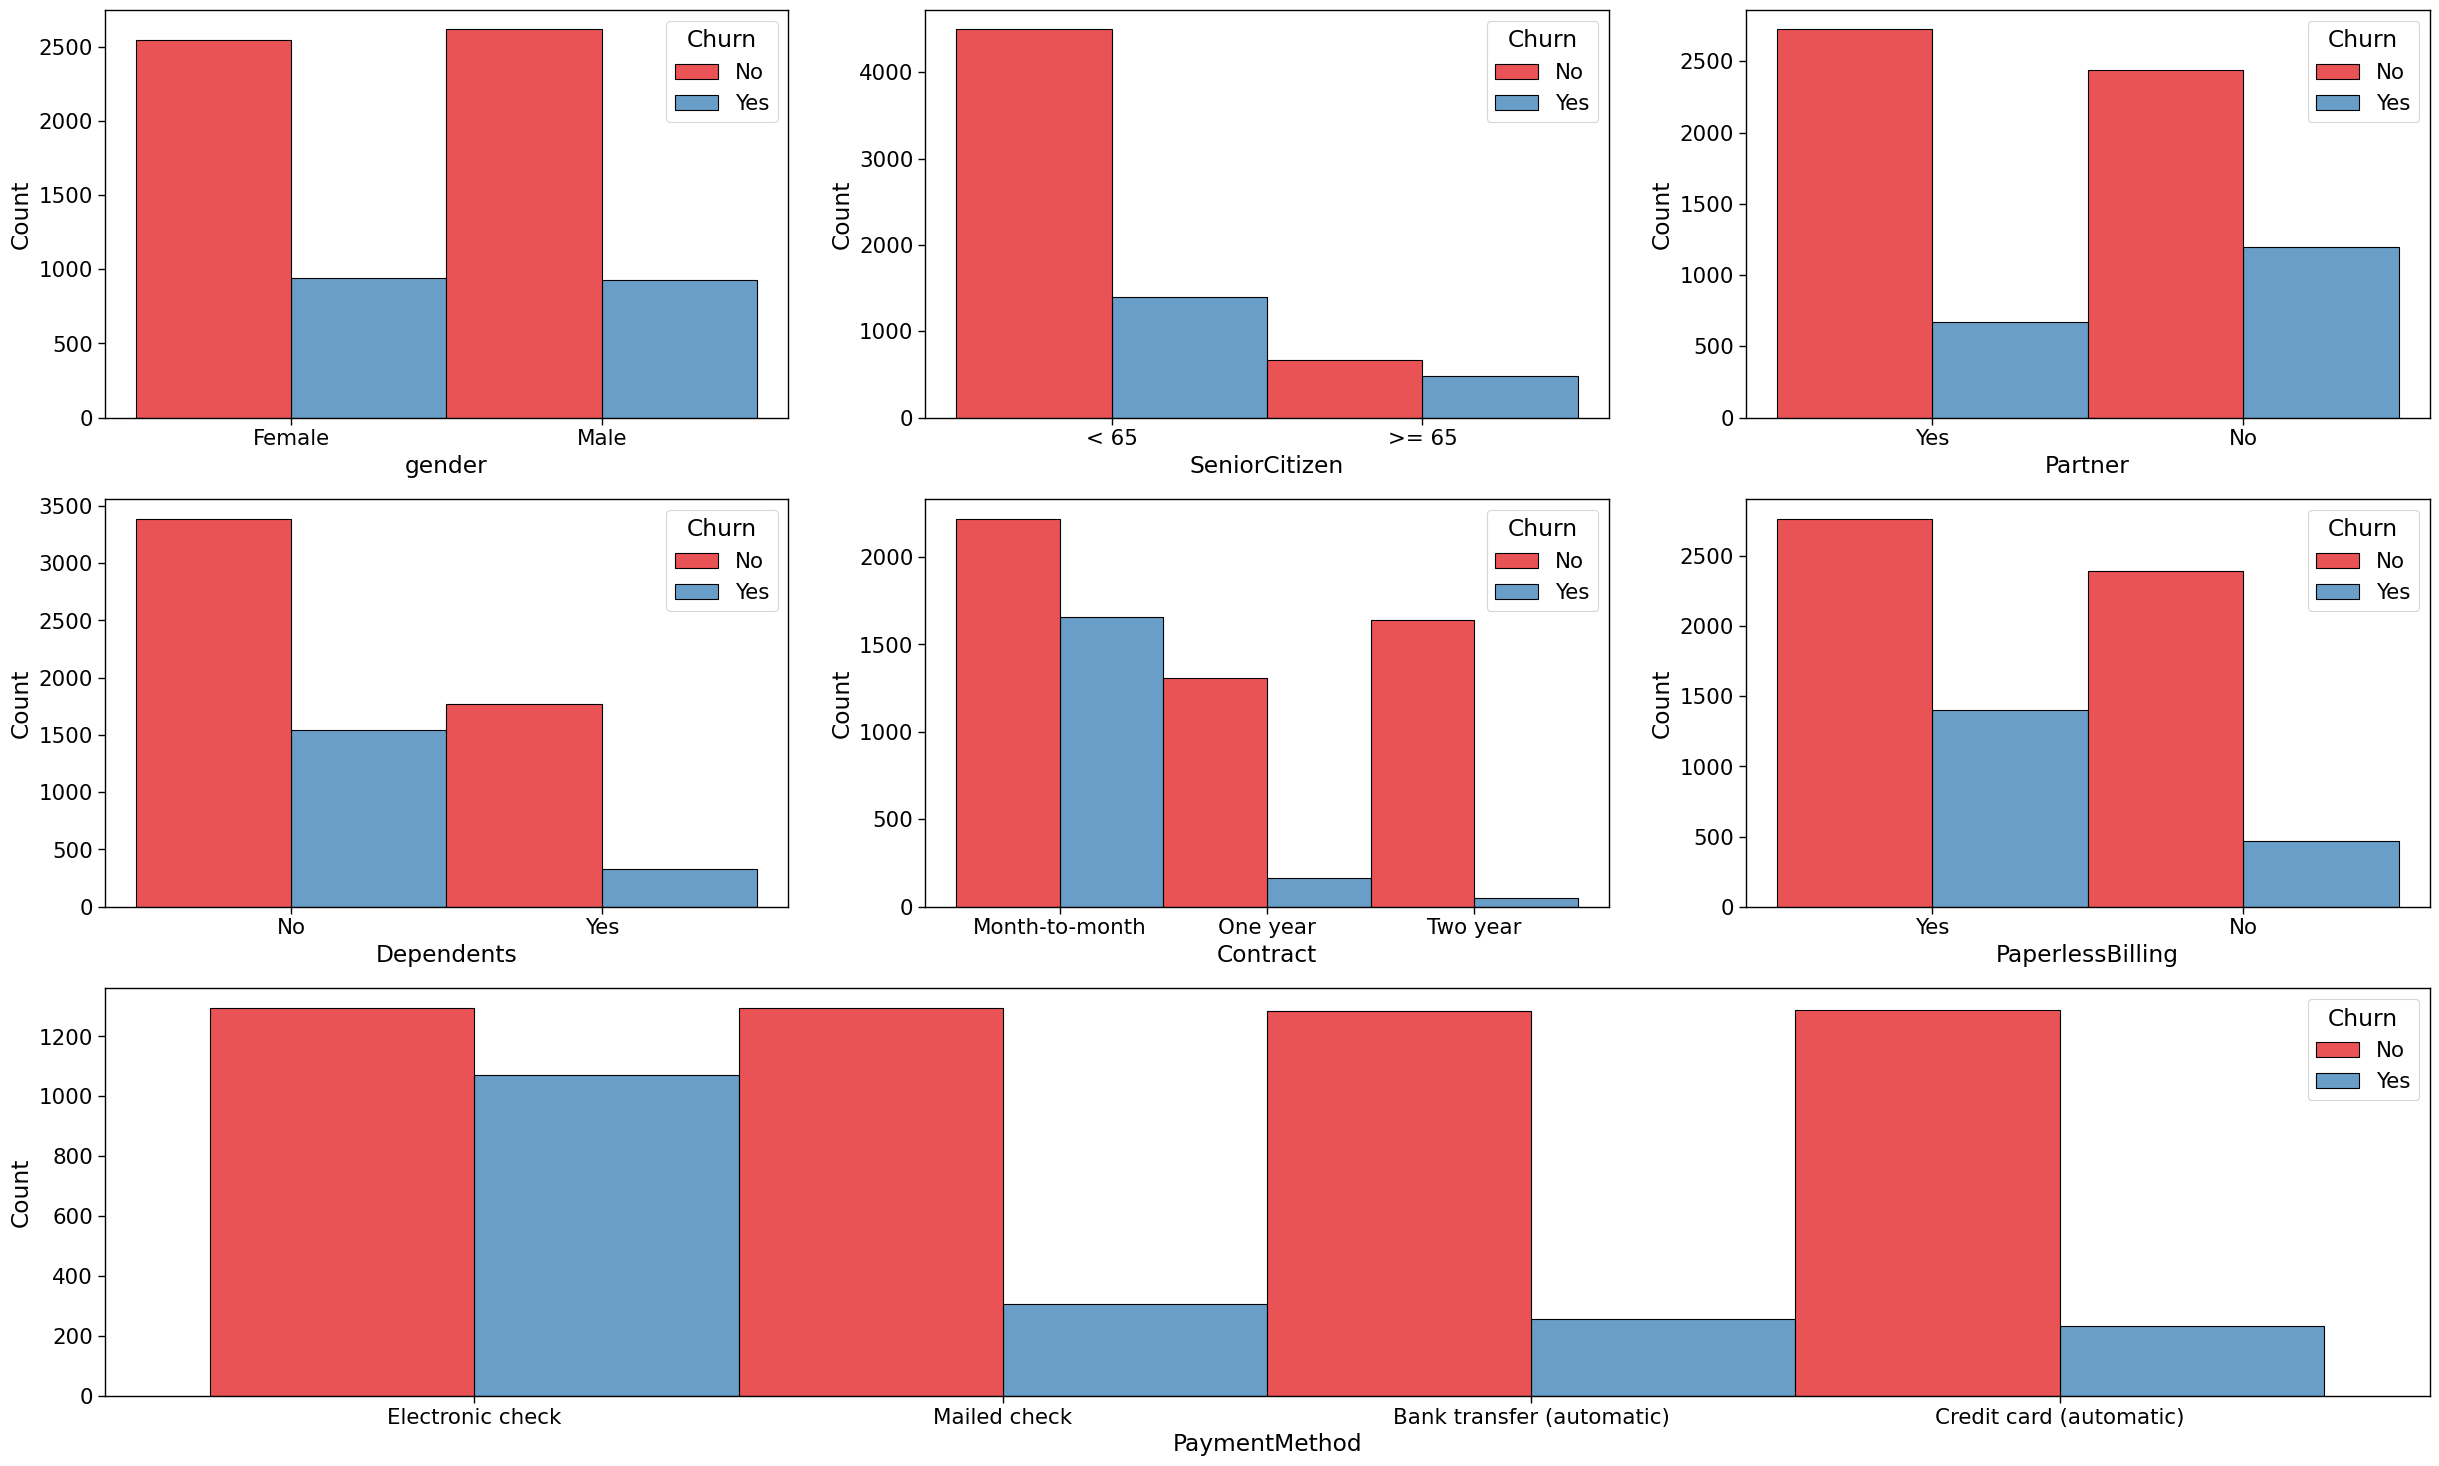

In [6]:
df['SeniorCitizen'].replace({0: '< 65', 1:">= 65"} , inplace=True)
sns.set_context('paper', font_scale=1.75)
plt.figure(1,figsize=(30,18))
plt.subplot(331)
sns.histplot(df, x='gender', hue='Churn', multiple='dodge', palette = 'Set1')
plt.subplot(332)
sns.histplot(df, x='SeniorCitizen', hue='Churn', multiple='dodge', palette = 'Set1')
plt.subplot(333)
sns.histplot(df, x='Partner', hue='Churn', multiple='dodge', palette = 'Set1')
plt.subplot(334)
sns.histplot(df, x='Dependents', hue='Churn', multiple='dodge', palette = 'Set1')
plt.subplot(335)
sns.histplot(df, x='Contract', hue='Churn', multiple='dodge', palette = 'Set1')
plt.subplot(336)
sns.histplot(df, x='PaperlessBilling', hue='Churn', multiple='dodge', palette = 'Set1')
plt.subplot(313)
#plt.xticks(rotation=45)
sns.histplot(df, x='PaymentMethod', hue='Churn', multiple='dodge', palette = 'Set1')

In [7]:
# Convert all yes and no to 0's & 1's so our classifier can use this data.
df['SeniorCitizen'].replace({'< 65': 0, ">= 65": 1} , inplace=True)
columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'OnlineSecurity',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df[item].replace(to_replace='Yes', value=1, inplace=True)
    df[item].replace(to_replace='No',  value=0, inplace=True)
    
# scale tenure and MonthlyCharges
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[['tenure', 'MonthlyCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges']])
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0  7590-VHVEG  Female              0        1           0 -0.608696   
1  5575-GNVDE    Male              0        0           0  0.108696   
2  3668-QPYBK    Male              0        0           0 -0.586957   
3  7795-CFOCW    Male              0        0           0  0.347826   
4  9237-HQITU  Female              0        0           0 -0.586957   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL              0  ...   
1             1                No             DSL              1  ...   
2             1                No             DSL              1  ...   
3             0  No phone service             DSL              1  ...   
4             1                No     Fiber optic              0  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                0           0           0               0  Month-to-month   
1                1           0           0               0        One year   
2                0           0           0               0  Month-to-month   
3                1           1           0               0        One year   
4                0           0           0               0  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                1           Electronic check      -0.746200         29.85   
1                0               Mailed check      -0.246891       1889.50   
2                1               Mailed check      -0.304007        108.15   
3                0  Bank transfer (automatic)      -0.516813       1840.75   
4                1           Electronic check       0.006449        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1  

[5 rows x 21 columns]

#### Feature Selection: Correlation matrix

C:\Users\admin\AppData\Local\Temp\ipykernel_28924\967981831.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

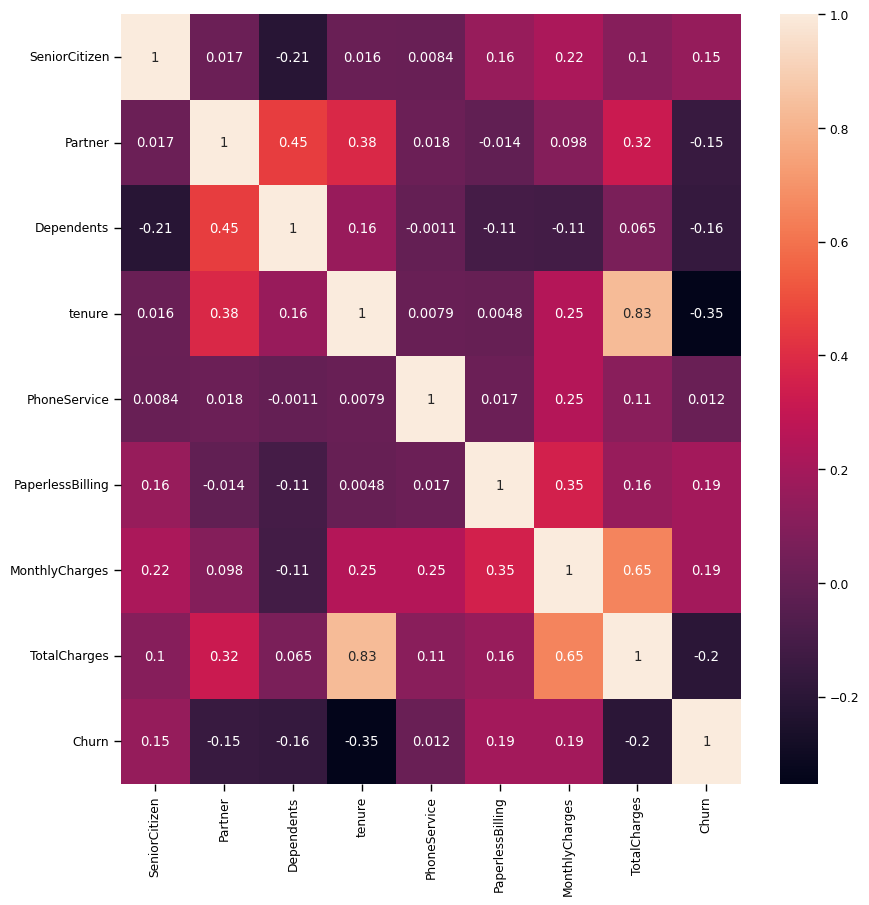

In [8]:
sns.set_context('paper', font_scale=1)
# compute the pair wise correlation for all columns  
correlation_matrix = df.corr()
# use the heatmap function from seaborn to plot the correlation matrix
# Manipulate figsize in inches for 
fig, ax = plt.subplots(figsize=(10,10))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

#### Encode categorical data

In [9]:
# remove customerID and TotalCharges
try:
    del df['customerID'] # not needed in analysis (it will lead to feature explosion in one hot encoding)
    del df['TotalCharges'] # highly correlated with tenure and MonthlyCharges
except:
    print("already removed customerID and TotalCharges")

# Use one-hot encoding to convert categorical data to binary (0 or 1)
df_dummies = pd.get_dummies(df)
df_dummies.fillna(value=0, inplace=True)
df_dummies.head()

SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0              0        1           0 -0.608696             0   
1              0        0           0  0.108696             1   
2              0        0           0 -0.586957             1   
3              0        0           0  0.347826             0   
4              0        0           0 -0.586957             1   

   PaperlessBilling  MonthlyCharges  Churn  gender_Female  gender_Male  ...  \
0                 1       -0.746200      0              1            0  ...   
1                 0       -0.246891      0              0            1  ...   
2                 1       -0.304007      1              0            1  ...   
3                 0       -0.516813      0              0            1  ...   
4                 1        0.006449      1              1            0  ...   

   StreamingMovies_0  StreamingMovies_1  StreamingMovies_No internet service  \
0                  1                  0                                    0   
1                  1                  0                                    0   
2                  1                  0                                    0   
3                  1                  0                                    0   
4                  1                  0                                    0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 41 columns]

#### Feature Selection: Forward Selection

best combination (ACC: 0.799): (0, 3, 4, 5, 9, 10, 11, 13, 15, 20, 22, 31, 33, 38, 39)



(<Figure size 1000x1000 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

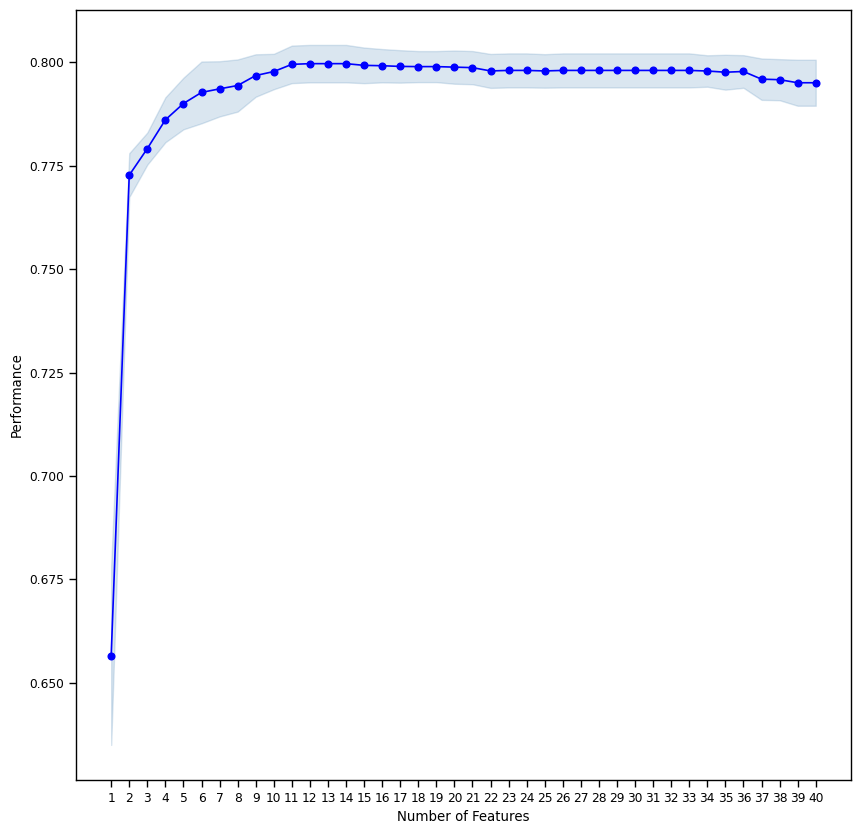

In [10]:
# extract Features and target variables
X = df_dummies.loc[:,[i for i in df_dummies.columns if i != 'Churn']].values # Feature Variables
y = df_dummies.loc[:,'Churn'].values # Feature Variable

from sklearn.linear_model  import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

log = LogisticRegression()

from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
f1_weighted = make_scorer(f1_score, average='weighted')

sfs_range = SFS(estimator=log, 
           k_features=(15, 40),
           forward=True, 
           floating=False, 
           scoring=f1_weighted,
           cv=5)

sfs_range = sfs_range.fit(X, y)

print('best combination (ACC: %.3f): %s\n' % (sfs_range.k_score_, sfs_range.k_feature_idx_))
# print('all subsets:\n', sfs_range.subsets_)
plt.rcParams["figure.figsize"] = (10,10)
plot_sfs(sfs_range.get_metric_dict(), kind='std_err')

In [11]:
# keep 15 most important features that maximize the accuracy
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X[:, sfs_range.k_feature_idx_]

X_sfs = sfs_range.transform(X)

In [12]:
#Dividing data into test & train splitting 80% data for training anf 20% for test
X_train, X_test, y_train, y_test = train_test_split(X_sfs, y, test_size=0.20)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 5625 samples in the training set and 1407 samples in the test set


### Classification

#### We will run all classifiers to have an initial look at the performance

##### Defining function for Confusion Matrix , Precision, Recall and F1 Score

In [13]:
#Creating function for Confusion Matrix , Precsion, Recall and F1 Score
def plot_confusion_matrix(classifier, y_test, y_pred_test):
    cm = confusion_matrix(y_test, y_pred_test)
    
    print("\n",classifier,"\n")
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Churn-No','Churn-Yes']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    #F1 = 2*recall*precision/(recall+precision)
    F1 = f1_score(y_test, y_pred_test, average='weighted')

    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))
    return;

##### Defining function for Precision Recall Curve

In [14]:
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_prec_rec_curve(classifier, y_test, y_pred_score):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_score)
    average_precision = average_precision_score(y_test, y_pred_score)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

#### Master Classification Engine


 LogisticRegression 



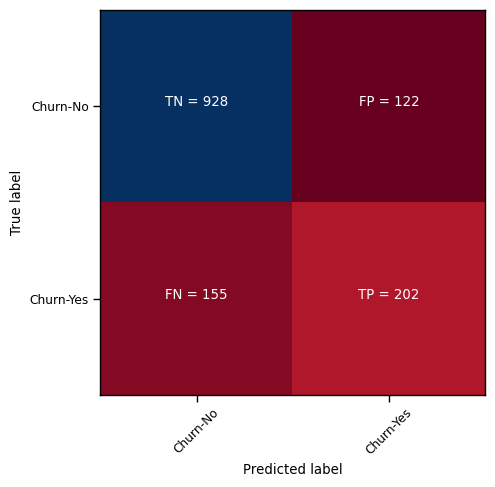

Recall=0.566 
Precision=0.623
F1=0.800
Average precision-recall score: 0.630


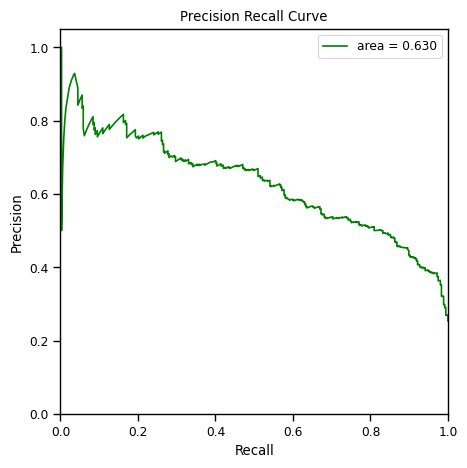


 KNeighborsClassifier 



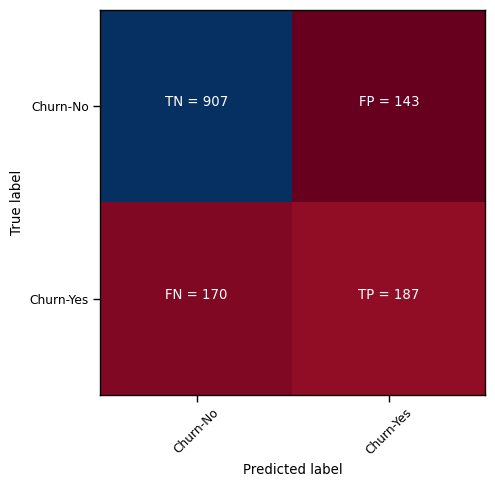

Recall=0.524 
Precision=0.567
F1=0.775
Average precision-recall score: 0.514


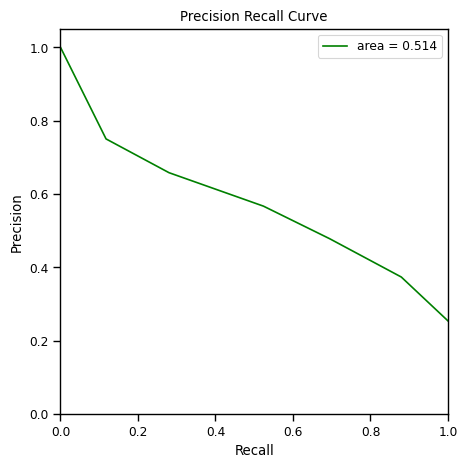


 GaussianNB 



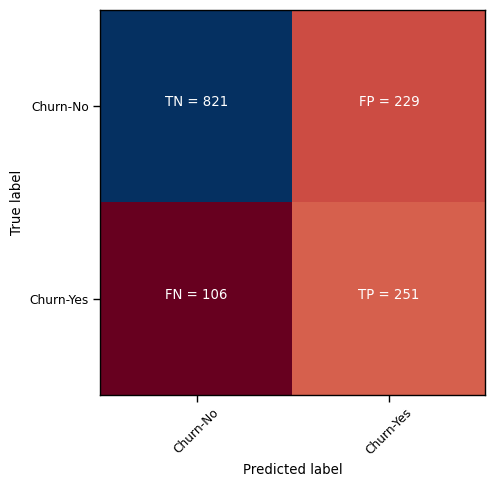

Recall=0.703 
Precision=0.523
F1=0.772
Average precision-recall score: 0.581


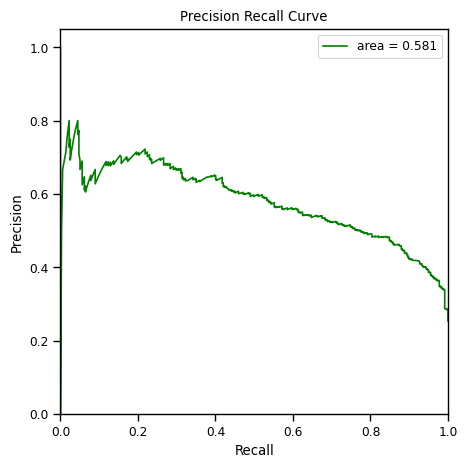


 SVC 



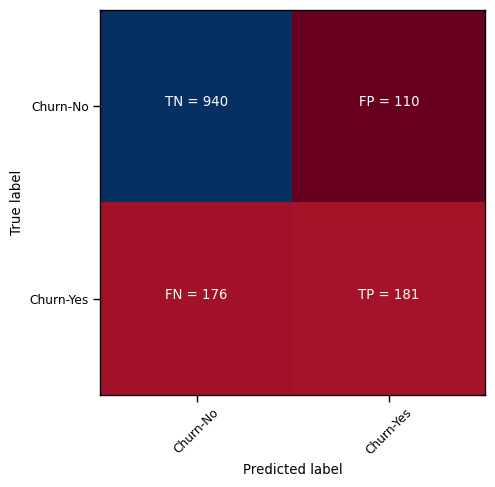

Recall=0.507 
Precision=0.622
F1=0.789
Average precision-recall score: 0.623


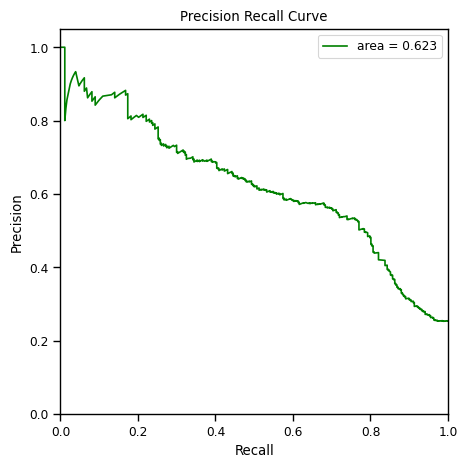


 DecisionTreeClassifier 



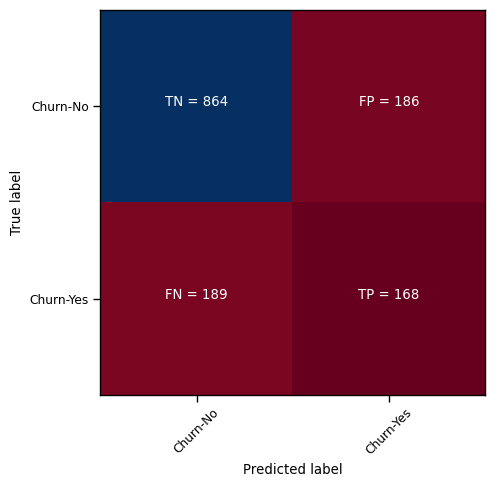

Recall=0.471 
Precision=0.475
F1=0.733
Average precision-recall score: 0.367


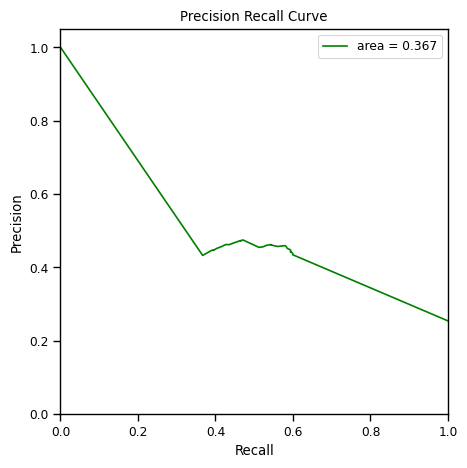


 RandomForestClassifier 



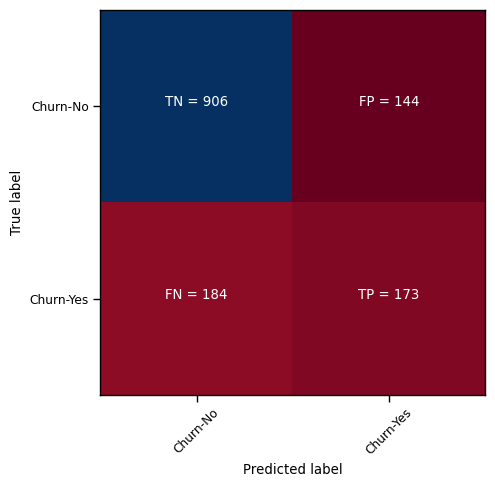

Recall=0.485 
Precision=0.546
F1=0.762
Average precision-recall score: 0.545


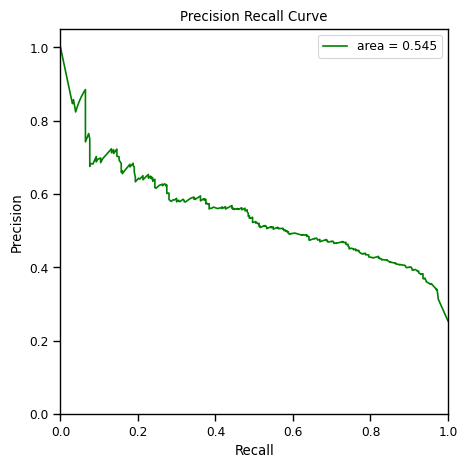


 SGDClassifier 



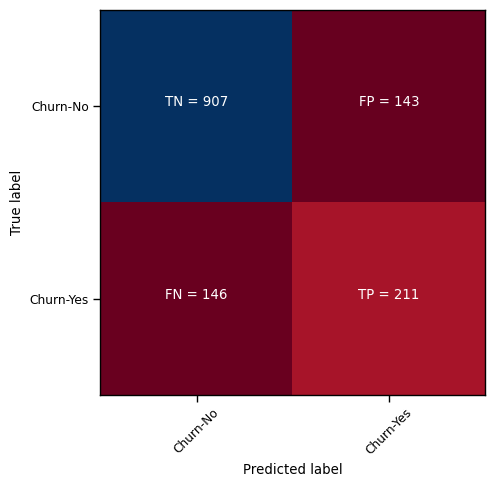

Recall=0.591 
Precision=0.596
F1=0.794
Average precision-recall score: 0.621


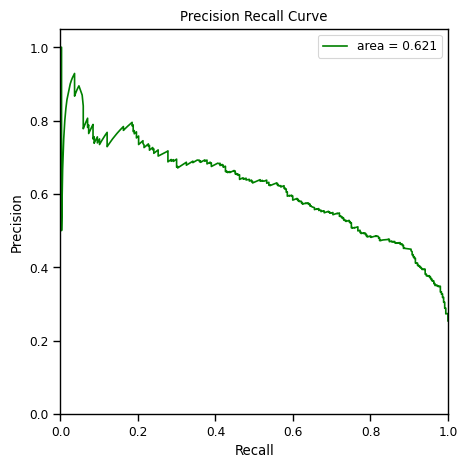


 AdaBoostClassifier 



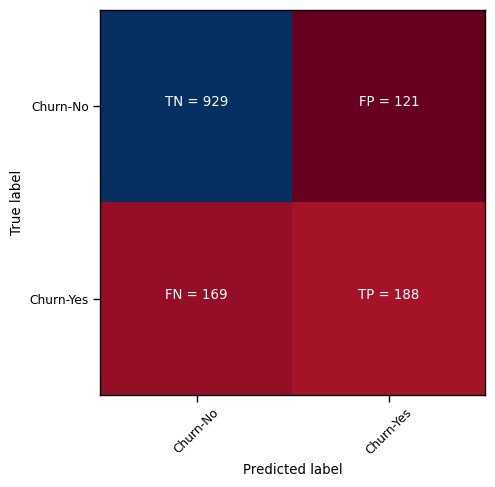

Recall=0.527 
Precision=0.608
F1=0.789
Average precision-recall score: 0.646


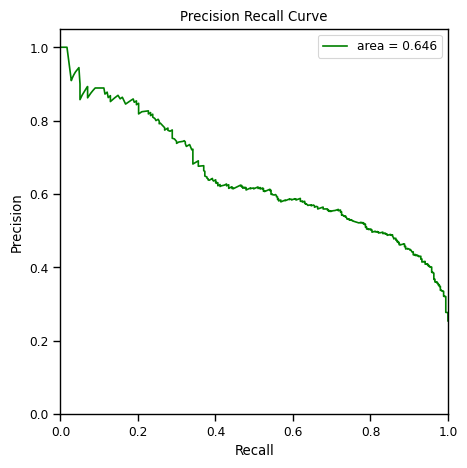

In [15]:
plt.rcParams["figure.figsize"] = (5,5)

# Making a list of all classifiers
classifier_model = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), GaussianNB(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), SGDClassifier(), AdaBoostClassifier()]

# Creating empty list to store the performance details
classifier_model_list= []
classifier_accuracy_test = []
classifier_accuracy_train = []
f1score = []
precisionscore = []
recallscore = []
avg_pre_rec_score = []
cv_score = []

for classifier_list in classifier_model:
    classifier = classifier_list
 
    # Fitting the training set into classification model
    classifier.fit(X_train,y_train)
    
    # Predicting the output on test dataset
    y_pred_test = classifier.predict(X_test)    
    score_test = accuracy_score(y_test, y_pred_test)
    
    # Predicting the output on training datset
    y_pred_train = classifier.predict(X_train) 
    score_train = accuracy_score(y_train, y_pred_train)
    
    # Cross Validation Score on training test
    scores = cross_val_score(classifier, X_train,y_train, cv=10)
    cv_score.append(scores.mean())
    
    #Keeping the model and accuracy score into a list
    classifier_model_list.append(classifier_list.__class__.__name__)
    classifier_accuracy_test.append(round(score_test,4))
    classifier_accuracy_train.append(round(score_train,4))
    
    #Precision, Recall and F1 score
    f1score.append(f1_score(y_test, y_pred_test, average='weighted'))
    precisionscore.append(precision_score(y_test, y_pred_test))
    recallscore.append(recall_score(y_test, y_pred_test))
    
    #Calculating Average Precision Recall Score
    try:
        y_pred_score = classifier.decision_function(X_test)
    except:
        y_pred_score = classifier.predict_proba(X_test)[:,1]
    
    from sklearn.metrics import average_precision_score
    average_precision = average_precision_score(y_test, y_pred_score)
    avg_pre_rec_score.append(average_precision)
    
    
    #Confusion Matrix
    plot_confusion_matrix(classifier_list.__class__.__name__, y_test, y_pred_test)
    plot_prec_rec_curve(classifier_list.__class__.__name__, y_test, y_pred_score)

### Classification Model Performance Evaluation

In [16]:
#Creating pandas dataframe with Model and corresponding accuracy
#accuracy_df = pd.DataFrame({'Model':classifier_model_list , 'Test Accuracy':classifier_accuracy_test, 'Train Accuracy' :classifier_accuracy_test , 'Precision':precisionscore, 'Recall':recallscore ,'F1 Score':f1score},index=None)
accuracy_df = pd.DataFrame({'Model':classifier_model_list , 'Cross Val Score':cv_score, 'Test Accuracy' :classifier_accuracy_test , 'Precision':precisionscore, 'Recall':recallscore ,'Avg Precision Recall':avg_pre_rec_score ,'F1 Score':f1score})

# Calculating Average Accuracy = (Test + Train)/2
accuracy_df['Average_Accuracy'] =  (accuracy_df['Cross Val Score'] + accuracy_df['Test Accuracy'] )/ 2

#Arranging the Columns
print("\n*------------------------------    CLASSIFICATION MODEL PERFORMANCE EVALUATION      ---------------------*\n")
accuracy_df = accuracy_df[['Model','Cross Val Score', 'Test Accuracy', 'Average_Accuracy','Precision', 'Recall','Avg Precision Recall','F1 Score']]  # This will arrange the columns in the order we want

#Sorting the Columns based on Average Accuracy
accuracy_df.sort_values('Average_Accuracy', axis=0, ascending=False, inplace=True) # Sorting the data with highest accuracy in the top
accuracy_df
#accuracy_df.transpose()


*------------------------------    CLASSIFICATION MODEL PERFORMANCE EVALUATION      ---------------------*



Model  Cross Val Score  Test Accuracy  Average_Accuracy  \
0      LogisticRegression         0.806751         0.8031          0.804925   
7      AdaBoostClassifier         0.809948         0.7939          0.801924   
3                     SVC         0.797683         0.7967          0.797192   
6           SGDClassifier         0.798218         0.7946          0.796409   
1    KNeighborsClassifier         0.769774         0.7775          0.773637   
5  RandomForestClassifier         0.768706         0.7669          0.767803   
2              GaussianNB         0.769771         0.7619          0.765836   
4  DecisionTreeClassifier         0.736888         0.7335          0.735194   

   Precision    Recall  Avg Precision Recall  F1 Score  
0   0.623457  0.565826              0.629525  0.799880  
7   0.608414  0.526611              0.645876  0.788763  
3   0.621993  0.507003              0.623442  0.789476  
6   0.596045  0.591036              0.620836  0.794312  
1   0.566667  0.523810              0.514450  0.774581  
5   0.545741  0.484594              0.545093  0.762141  
2   0.522917  0.703081              0.581346  0.771993  
4   0.474576  0.470588              0.366614  0.733103

##### Logistic Regression and Adaboost model looks promising (highest Avg Precision Recall and F1 score). Let's try to improve the model

### Improving our Model: Model Tuning

#### Grid Search for Logistic Regression Classifier and running with optimized hyperparameters

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier

# Logistic Regression Classifier
clf = LogisticRegression()

# Hyperparameters
parameters = {'solver': ['newton-cg', 'liblinear', 'sag', 'saga'], # 'lbfgs' 
              'C': [0.001,0.01,0.1,1,10,100,1000],
              'max_iter': [10000]
             }

# Make an fbeta_score scoring object
#scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=f1_weighted)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# View best hyperparameters
#print(grid_srchfit.best_params_)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Default model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(f1_score(y_test, predictions, average='weighted')))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(f1_score(y_test, best_predictions, average='weighted')))
print (best_clf)

Default model
------
Accuracy score on testing data: 0.8031
F-score on testing data: 0.7999

Optimized Model
------
Final accuracy score on the testing data: 0.8038
Final F-score on the testing data: 0.8005
LogisticRegression(C=10, max_iter=10000, solver='newton-cg')


#### Grid Search for Adaboost Classifier and running with optimized hyperparameters

In [18]:
# Adaboost classifier
clf_ada = AdaBoostClassifier()

# Hyperparameters
parameters = {'n_estimators': [10, 50, 100, 500], 
              'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
             }

# Make an fbeta_score scoring object
#scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj_ada = GridSearchCV(estimator=clf_ada, param_grid=parameters, scoring=f1_weighted)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit_ada = grid_obj_ada.fit(X_train, y_train)

# Get the estimator
best_clf_ada = grid_fit_ada.best_estimator_

# Make predictions using the unoptimized and model
predictions_ada = (clf_ada.fit(X_train, y_train)).predict(X_test)
best_predictions_ada = best_clf_ada.predict(X_test)

# Report the before-and-afterscores
print ("Default model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions_ada)))
print ("F1-score on testing data: {:.4f}".format(f1_score(y_test, predictions_ada, average='weighted')))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions_ada)))
print ("Final F1-score on the testing data: {:.4f}".format(f1_score(y_test, best_predictions_ada, average='weighted')))
print (best_clf_ada)

Default model
------
Accuracy score on testing data: 0.7939
F1-score on testing data: 0.7888

Optimized Model
------
Final accuracy score on the testing data: 0.7989
Final F1-score on the testing data: 0.7942
AdaBoostClassifier(learning_rate=0.1, n_estimators=500)
